In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
df=pd.read_excel('NUAR-B_08_04_2025-11_26_21_CONVERTIO.xlsx',parse_dates=["DATE/TIME(America/Asuncion)"])

In [3]:
df

,DATE/TIME(America/Asuncion),Flow Rate Prop. BR,Flow Rate Prop. CNT,Flow Rate Prop. STB,Trip Volume Prop. BR,Trip Volume Prop. CNT,Trip Volume Prop. STB,Flow Rate Gen. 1,Flow Rate Gen. 2,Trip Volume Gen. 1,...,% Carga Motor Gen. 1,% Carga Motor Gen. 2,Voltaje Alt. Prop. BR,Voltaje Alt. Prop. CNT,Voltaje Alt. Prop. STB,Voltaje Alt. Gen. 1,Voltaje Alt. Gen. 2,TK Gen. Aux,Flow Rate Gen. Aux,Trip Volume Gen. Aux
0,2025-01-04 11:26:37,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.7,0.0,1491,...,0,0,NaN,NaN,NaN,0,0,819.0840,0,62
1,2025-01-04 11:36:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.3,0.0,1492,...,0,0,NaN,NaN,NaN,0,0,819.0840,0,62
2,2025-01-04 11:46:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.2,0.0,1493,...,0,0,NaN,NaN,NaN,0,0,814.9680,0,62
3,2025-01-04 11:56:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.5,0.0,1494,...,0,0,NaN,NaN,NaN,0,0,814.9680,0,62
4,2025-01-04 12:06:46,NaN,NaN,NaN,361667.658499,335968.958002,327010.739697,6.5,0.0,1495,...,0,0,NaN,NaN,NaN,0,0,814.9680,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,2025-08-04 09:28:53,222.5,225.5,207.8,377253.000000,350692.000000,341220.000000,0.0,8.5,1905,...,0,0,24.65,24.35,24.65,0,0,810.6462,0,62
973,2025-08-04 09:39:23,226.1,224.9,210.6,377294.000000,350734.000000,341258.000000,0.0,7.7,1905,...,0,0,24.60,24.35,24.65,0,0,814.9680,0,62
974,2025-08-04 09:49:53,219.6,218.8,214.7,377332.000000,350771.000000,341293.000000,0.0,9.5,1905,...,0,0,24.55,24.35,24.60,0,0,814.9680,0,62
975,2025-08-04 09:59:21,227.1,223.8,210.3,377369.000000,350808.000000,341327.000000,0.0,8.4,1905,...,0,0,24.65,24.35,24.65,0,0,814.9680,0,62


In [4]:
# Extraemos los componentes

df['dia'] = df['DATE/TIME(America/Asuncion)'].dt.day
df['mes'] = df['DATE/TIME(America/Asuncion)'].dt.month
df['año'] = df['DATE/TIME(America/Asuncion)'].dt.year
df['hora'] = df['DATE/TIME(America/Asuncion)'].dt.hour
df['minuto'] = df['DATE/TIME(America/Asuncion)'].dt.minute
df['segundo'] = df['DATE/TIME(America/Asuncion)'].dt.second

In [5]:
df=df.drop('DATE/TIME(America/Asuncion)',axis=1)

# Definir variables de entrada y salida
X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
feature_names=X.columns
y_BR = df["Flow Rate Prop. BR"]
y_STB = df["Flow Rate Prop. STB"]

In [6]:
# # Manejar valores nulos con la mediana
imputer = SimpleImputer(strategy="median")

X_imputed = imputer.fit_transform(X)

# 4. Volver a convertir a DataFrame si querés conservar nombres
X_imputed = pd.DataFrame(X_imputed, columns=feature_names)

y_BR = imputer.fit_transform(y_BR.to_frame())
y_STB = imputer.fit_transform(y_STB.to_frame())

In [7]:
# # Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train_BR, y_test_BR = train_test_split(X_imputed, y_BR, test_size=0.4, random_state=42)
X_train, X_test, y_train_STB, y_test_STB = train_test_split(X_imputed, y_STB, test_size=0.4, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
# # Normalizar los datos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# # Separar entradas (X) y salidas (y)
# X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
# y = df[["Flow Rate Prop. BR", "Flow Rate Prop. STB"]]

# # Imputar valores nulos con la mediana
# imputer = SimpleImputer(strategy="median")
# X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# y_imputed = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)

# # Dividir en entrenamiento y prueba (mismo índice para ambos targets)
# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.1, random_state=24)

# y_train_BR = y_train["Flow Rate Prop. BR"]
# y_test_BR = y_test["Flow Rate Prop. BR"]
# y_train_STB = y_train["Flow Rate Prop. STB"]
# y_test_STB = y_test["Flow Rate Prop. STB"]

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definir la arquitectura de la red neuronal
model_BR = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    layers.Dense(64, activation='relu'),  # Capa oculta 2
    layers.Dense(32, activation='relu'),  # Capa oculta 3
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Capa de salida (predicción)
])

model_STB=keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    layers.Dense(64, activation='relu'),  # Capa oculta 2
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),  # Capa oculta 3
    layers.Dense(1)  # Capa de salida (predicción)
])

# Compilar el modelo
model_BR.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_STB.compile(optimizer='adam', loss='mse', metrics=['mae'])


2025-04-23 16:25:03.533673: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-23 16:25:03.550875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745436303.566252   10199 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745436303.569175   10199 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745436303.578435   10199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [11]:
history_BR = model_BR.fit(X_train_scaled, y_train_BR, 
                          validation_data=(X_test_scaled, y_test_BR),
                          epochs=40, batch_size=16, verbose=0)

history_STB=model_STB.fit(X_train_scaled, y_train_STB, 
                          validation_data=(X_test_scaled, y_test_STB),
                          epochs=40, batch_size=16, verbose=0)

I0000 00:00:1745436307.871143   10274 service.cc:152] XLA service 0x7fc9fc015a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745436307.871182   10274 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-23 16:25:07.891573: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745436308.060033   10274 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745436310.600868   10274 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [12]:
loss_BR, mae_BR = model_BR.evaluate(X_test, y_test_BR)
loss_STB, mae_STB = model_STB.evaluate(X_test, y_test_STB)

print(f"MAE_BR en test: {mae_BR:.2f}")
print(f"MAE en test: {mae_STB:.2f}")

2025-04-23 16:25:54.311368: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 12 bytes spill stores, 12 bytes spill loads

2025-04-23 16:25:54.538817: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_28', 4 bytes spill stores, 4 bytes spill loads



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 703350823714816.0000 - mae: 26515032.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 538272916832256.0000 - mae: 23196784.0000
MAE_BR en test: 26497744.00
MAE en test: 23184250.00


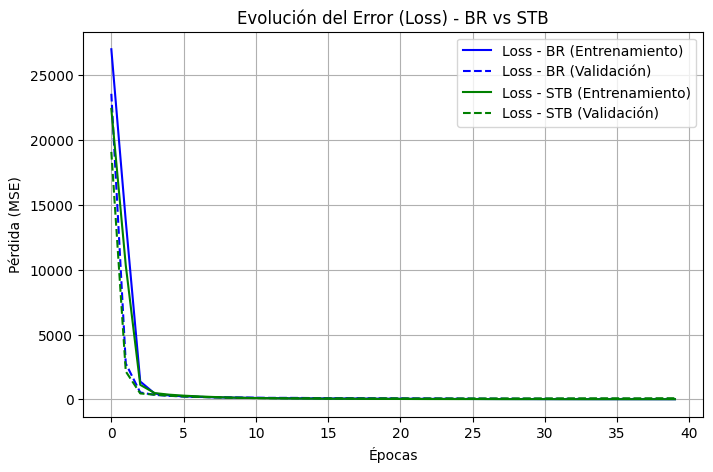

In [13]:
plt.figure(figsize=(8, 5))

# Pérdida (Loss) para BR
plt.plot(history_BR.history['loss'], label='Loss - BR (Entrenamiento)', color='blue')
plt.plot(history_BR.history['val_loss'], label='Loss - BR (Validación)', color='blue', linestyle="--")

# Pérdida (Loss) para STB
plt.plot(history_STB.history['loss'], label='Loss - STB (Entrenamiento)', color='green')
plt.plot(history_STB.history['val_loss'], label='Loss - STB (Validación)', color='green', linestyle="--")

plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.title("Evolución del Error (Loss) - BR vs STB")
plt.legend()
plt.grid()
plt.show()

In [16]:
# Predicciones en el conjunto de prueba
y_pred_BR = model_BR.predict(X_test_scaled) # CON DATOS ESCALADOS
y_pred_STB = model_STB.predict(X_test_scaled) # CON DATOS ESCALADOS

# Cálculo de métricas para Flow Rate Prop. BR
mae_BR = mean_absolute_error(y_test_BR, y_pred_BR)
mse_BR = mean_squared_error(y_test_BR, y_pred_BR)
rmse_BR = np.sqrt(mse_BR)
r2_BR = r2_score(y_test_BR, y_pred_BR)

# Cálculo de métricas para Flow Rate Prop. STB
mae_STB = mean_absolute_error(y_test_STB, y_pred_STB)
mse_STB = mean_squared_error(y_test_STB, y_pred_STB)
rmse_STB = np.sqrt(mse_STB)
r2_STB = r2_score(y_test_STB, y_pred_STB)

# Mostrar resultados
print("**Errores para Flow Rate Prop. BR:**")
print(f"MAE: {mae_BR:.2f}")
print(f"MSE: {mse_BR:.2f}")
print(f"RMSE: {rmse_BR:.2f}")
print(f"R²: {r2_BR:.4f}\n")

print("**Errores para Flow Rate Prop. STB:**")
print(f"MAE: {mae_STB:.2f}")
print(f"MSE: {mse_STB:.2f}")
print(f"RMSE: {rmse_STB:.2f}")
print(f"R²: {r2_STB:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
**Errores para Flow Rate Prop. BR:**
MAE: 3.74
MSE: 35.96
RMSE: 6.00
R²: 0.9920

**Errores para Flow Rate Prop. STB:**
MAE: 4.47
MSE: 87.49
RMSE: 9.35
R²: 0.9776


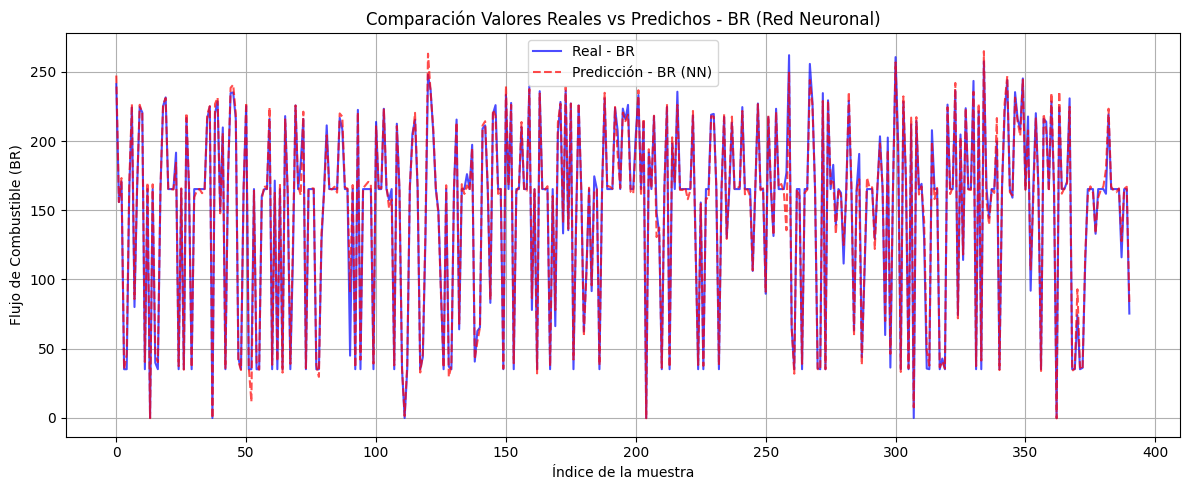

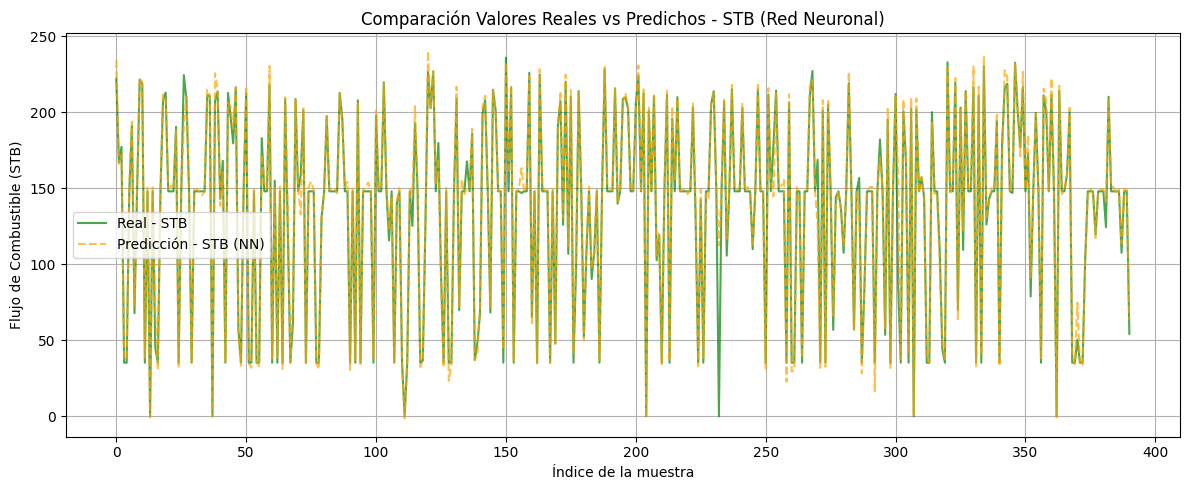

In [17]:
# Comparación gráfica para BR
plt.figure(figsize=(12, 5))
plt.plot(y_test_BR, label="Real - BR", linestyle="-", color="blue", alpha=0.7)
plt.plot(y_pred_BR, label="Predicción - BR (NN)", linestyle="--", color="red", alpha=0.7)
plt.xlabel("Índice de la muestra")
plt.ylabel("Flujo de Combustible (BR)")
plt.title("Comparación Valores Reales vs Predichos - BR (Red Neuronal)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Comparación gráfica para STB
plt.figure(figsize=(12, 5))
plt.plot(y_test_STB, label="Real - STB", linestyle="-", color="green", alpha=0.7)
plt.plot(y_pred_STB, label="Predicción - STB (NN)", linestyle="--", color="orange", alpha=0.7)
plt.xlabel("Índice de la muestra")
plt.ylabel("Flujo de Combustible (STB)")
plt.title("Comparación Valores Reales vs Predichos - STB (Red Neuronal)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
